Copyright © The University of Edinburgh, 2024.

Development has been supported by GSK.

# Plot MOA distinct from DMSO p-values

First with only JUMP MOA compounds considered

Got 150 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas


,Zhang,EuclideanPCA,Euclidean,Rank,TripletLoss,Cosine
MoA,,,,,,
control vehicle,0.665248,0.805316,0.69494,0.668544,0.556432,0.804616
PARP inhibitor,0.248380,0.105340,0.22014,0.239820,0.357320,0.117420
hepatocyte growth factor receptor inhibitor,0.042660,0.106200,0.20138,0.035620,0.167160,0.144460
BCL inhibitor,0.144880,0.016900,0.14268,0.138380,0.161340,0.060160
histone lysine demethylase inhibitor,0.103620,0.026000,0.26122,0.104200,0.060000,0.057160
hypoxia inducible factor inhibitor,0.084220,0.001640,0.19240,0.078300,0.143040,0.013940
p38 MAPK inhibitor,0.040220,0.003200,0.07808,0.037060,0.074500,0.073160
acetylcholine receptor antagonist,0.124960,0.000120,0.02236,0.122520,0.006780,0.007680
MAP kinase inhibitor,0.015500,0.005160,0.02148,0.012800,0.196820,0.010600


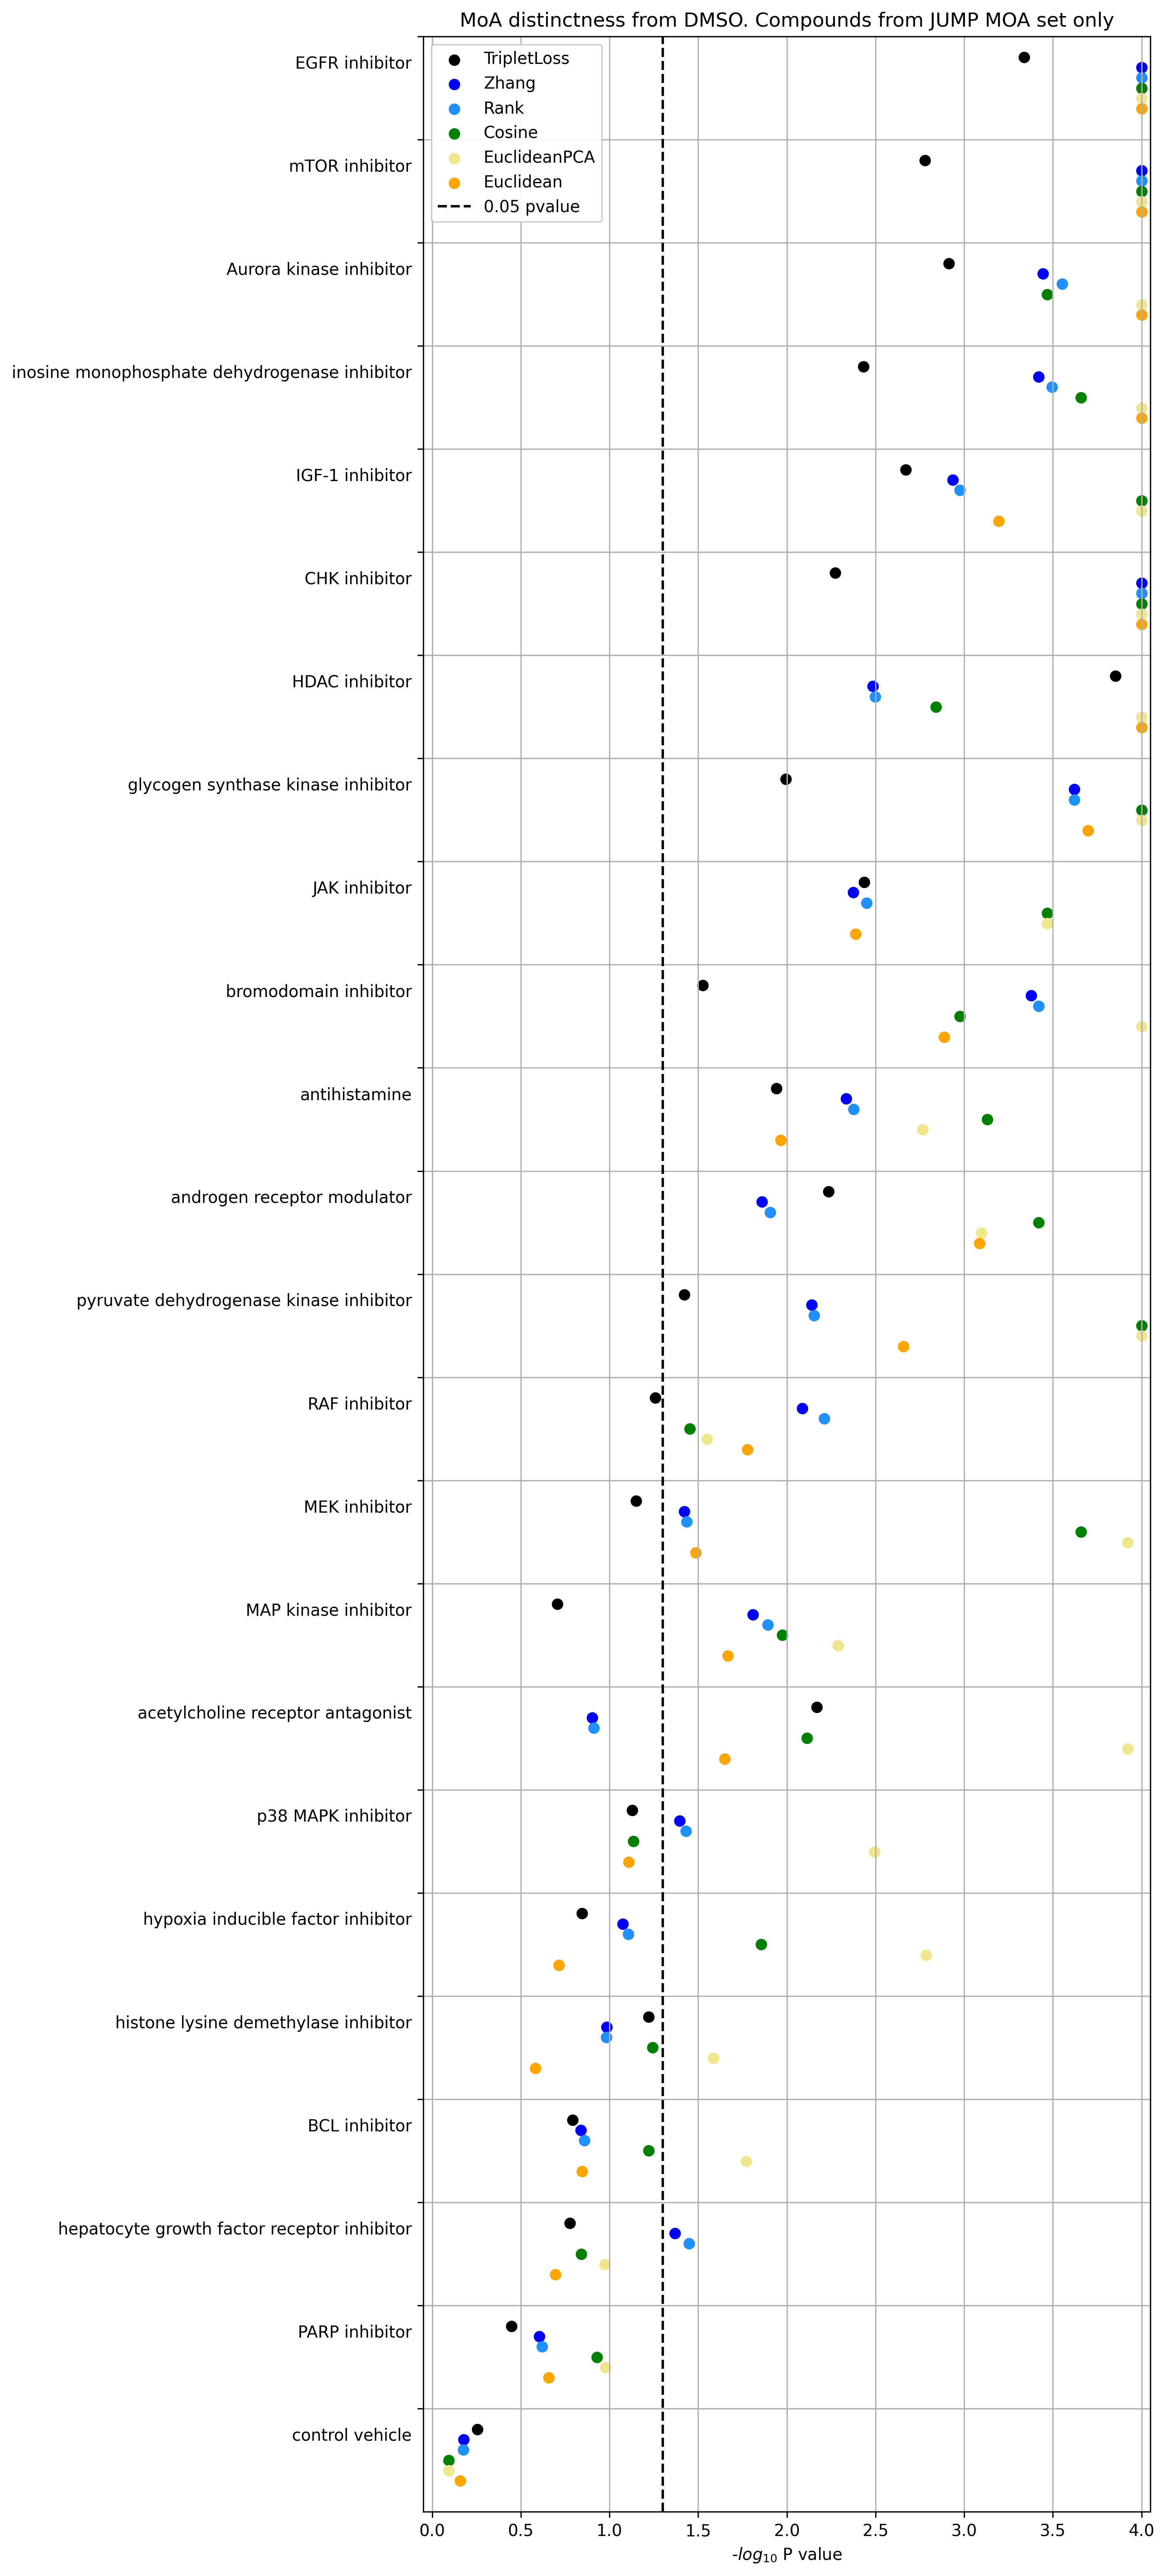

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import leakproofcmap
jump_moa_counts_df = pd.read_csv(
        "working_dir/plot_data/jump_moas_in_filtered_cmap.csv", index_col=[0]
    )

jump_moa_cpd_counts_df = pd.read_csv(
        "working_dir/plot_data/jump_moa_cpds_in_filtered_cmap.csv", index_col=[0]
    )

df_wideform=pd.DataFrame()
working_dir=Path("working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas")
p_value_files=list(working_dir.glob("pt_*jump*.csv"))
print(f"Got {len(p_value_files)} sample files from {working_dir}")

# for f in p_value_files:
#     _df=pd.read_csv(f, index_col=[0]).rename(columns={'distinct_from_dmso_pvalue':f.stem.split("_")[1]})
#     display(_df)
#     assert False
#     for idx, row in _df.iterrows():
#         df_wideform.loc[idx, _df.columns]=row.values

df_wideform=pd.concat([pd.read_csv(f, index_col=[0]).rename(columns={'pvalue':f.stem.split("_")[1]}) for f in p_value_files], axis=0)
df_wideform=df_wideform.reset_index().groupby("index").mean()
df_wideform=df_wideform
df_wideform.index.name="MoA"
df_wideform['sum_pvalues']=df_wideform.sum(axis=1)
df_wideform=df_wideform.sort_values("sum_pvalues", ascending=False).drop(columns='sum_pvalues')
display(df_wideform)
#df_wideform=df_wideform.drop(columns=['sum_pvalues'])
df_wideform.to_csv(working_dir/"merged_wideform_pvalues.csv")
df_wideform.index.name="MoA"
# df_longform=df_wideform.reset_index().melt(id_vars=["MoA"],var_name='metric',value_name='pvalue').rename(columns={'MoA':'metric'})
# df_longform['-log10pvalue']=-np.log10(df_longform['pvalue'])
# display(df_longform.sort_values("-log10pvalue"))
# Scatterplot
fig, ax=plt.subplots(1, figsize=(10,22), dpi=300)
Y=np.arange(len(df_wideform.index))

ax.grid()
for metric_i, metric in enumerate(['TripletLoss', 'Zhang', 'Rank', 'Cosine', 'EuclideanPCA', 'Euclidean']):
    ax.scatter(-np.log10(df_wideform[metric]),(Y-.1*metric_i-1)+0.8, label=metric, color=leakproofcmap.palette[metric])
ax.vlines([-np.log10(0.05)], -1,len(df_wideform.index), label="0.05 pvalue", color='k', linestyles=['dashed'])
ax.legend(framealpha=0.9, loc=2)
ax.set_yticks(Y, [f"\n{n}" for n in df_wideform.index])
ax.set_xlabel("-$log_{10}$ P value")
ax.set_xlim(-0.05,4.05)
ax.set_ylim(-1,len(df_wideform.index)-1)
ax.set_title("MoA distinctness from DMSO. Compounds from JUMP MOA set only")
plt.yticks(va='top')
plt.tight_layout()
fig.savefig(working_dir/"distinct_from_dmso_JUMPMOAS.png", dpi=300,pad_inches=0, bbox_inches='tight')
fig.savefig(working_dir/"distinct_from_dmso_JUMPMOAS.svg",pad_inches=0, bbox_inches='tight')
fig.show()


# Merged - McNemar's test

In [1]:
# McNemar's test - all compounds - merge all splits (in SI)

from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar
import json
from scipy.stats import combine_pvalues
import leakproofcmap

df_wideform=pd.DataFrame()
for working_dir in [
    Path("working_dir/plot_data/TripletLoss/155/distinctness"),
    Path("working_dir/plot_data/TripletLoss/155/distinctness_across_lines"),
    Path("working_dir/plot_data/TripletLoss/155/distinctness_moas"),
    Path("working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas"),
]:
    perf_df=pd.DataFrame()
    metrics=set([f.stem.split("_")[1] for f in list(working_dir.glob("pt_*_seed_7.csv")) if "jump" not in f.stem])
    print(metrics)
    results_dict={}

    for metric in metrics:
        p_value_files=[f for f in list(working_dir.glob(f"pt_{metric}_*_seed_7.csv")) if "jump" not in f.stem]
        print(f"Got {len(p_value_files)} sample files from {working_dir}")
        metric_df=pd.concat([pd.read_csv(f, index_col=[0]) for f in p_value_files])#.value_counts().to_dict()
        metric_df=metric_df[~metric_df.index.str.contains("DMSO") & ~metric_df.index.str.contains("vehicle")]
        perf_df.loc[metric, ['distinct', 'non_distinct', 'num_treatments']]=np.sum(metric_df['pvalue']<0.05),np.sum(metric_df['pvalue']>=0.05), len(metric_df)
    perf_df=perf_df.sort_values("distinct",ascending=False)
    perf_df['percent_distinct']=(perf_df['distinct']/perf_df['num_treatments'])*100
    best_scoring_metric, second_best_scoring_metric=perf_df.index[0:2].tolist()
    display(perf_df.loc[['TripletLoss','Rank','Zhang','Cosine','Euclidean','EuclideanPCA']].iloc[:,[0,1,3]].round(3))
    perf_df.to_csv(working_dir/"merged_splits_summary_for_SI.csv")
    print("Testing top 2: ", best_scoring_metric, second_best_scoring_metric)
    rank_1_df=pd.concat([pd.read_csv(f, index_col=0) for f in [f for f in list(working_dir.glob(f"pt_{best_scoring_metric}_*_seed_7.csv")) if "jump" not in f.stem]])
    rank_2_df=pd.concat([pd.read_csv(f, index_col=0) for f in [f for f in list(working_dir.glob(f"pt_{second_best_scoring_metric}_*_seed_7.csv")) if "jump" not in f.stem]])
    merged_df=rank_1_df.merge(rank_2_df, left_index=True, right_index=True,suffixes=(f"_{best_scoring_metric}", f"_{second_best_scoring_metric}"))
    contingency_table=np.array([
        [np.sum((merged_df[f'pvalue_{best_scoring_metric}']<0.05) & (merged_df[f'pvalue_{second_best_scoring_metric}']<0.05)),np.sum((merged_df[f'pvalue_{best_scoring_metric}']<0.05) & (merged_df[f'pvalue_{second_best_scoring_metric}']>=0.05))],
        [np.sum((merged_df[f'pvalue_{best_scoring_metric}']>=0.05) & (merged_df[f'pvalue_{second_best_scoring_metric}']<=0.05)),np.sum((merged_df[f'pvalue_{best_scoring_metric}']>=0.05) & (merged_df[f'pvalue_{second_best_scoring_metric}']>=0.05))],
    ])
    print(contingency_table)
    mcnemar_results=mcnemar(contingency_table)
    print(mcnemar_results)
    json.dump({'contingency_table':contingency_table.tolist(), 'mcnemar_results':{'pvalue':float(mcnemar_results.pvalue), 'statistic':float(mcnemar_results.pvalue)}}, open(working_dir/"mcnemar_pvalues.json", 'w'))


{'EuclideanPCA', 'Cosine', 'TripletLoss', 'Euclidean', 'Zhang', 'Rank'}
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness


,distinct,non_distinct,percent_distinct
TripletLoss,28513.0,34433.0,45.298
Rank,10581.0,52365.0,16.810
Zhang,10170.0,52776.0,16.157
Cosine,8740.0,54206.0,13.885
Euclidean,12438.0,50508.0,19.760
EuclideanPCA,9221.0,53725.0,14.649


Testing top 2:  TripletLoss Euclidean
[[ 7836 21267]
 [ 5120 29481]]
pvalue      0.0
statistic   5120.0
{'EuclideanPCA', 'Cosine', 'TripletLoss', 'Euclidean', 'Zhang', 'Rank'}
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines


,distinct,non_distinct,percent_distinct
TripletLoss,6148.0,392.0,94.006
Rank,5960.0,580.0,91.131
Zhang,5915.0,625.0,90.443
Cosine,6383.0,157.0,97.599
Euclidean,6230.0,310.0,95.260
EuclideanPCA,6406.0,134.0,97.951


Testing top 2:  EuclideanPCA Cosine
[[31397   633]
 [  518   777]]
pvalue      0.0007717624607794369
statistic   518.0
{'EuclideanPCA', 'Cosine', 'TripletLoss', 'Euclidean', 'Zhang', 'Rank'}
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_moas
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_moas
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_moas
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_moas
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_moas
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_moas


,distinct,non_distinct,percent_distinct
TripletLoss,3030.0,968.0,75.788
Rank,3240.0,758.0,81.041
Zhang,3217.0,781.0,80.465
Cosine,3328.0,670.0,83.242
Euclidean,3269.0,729.0,81.766
EuclideanPCA,3552.0,446.0,88.844


Testing top 2:  EuclideanPCA Cosine
[[3711  391]
 [ 157  489]]
pvalue      4.869910396448537e-24
statistic   157.0
{'EuclideanPCA', 'Cosine', 'TripletLoss', 'Euclidean', 'Zhang', 'Rank'}
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas
Got 25 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas


,distinct,non_distinct,percent_distinct
TripletLoss,2006.0,154.0,92.870
Rank,2007.0,153.0,92.917
Zhang,1996.0,164.0,92.407
Cosine,2100.0,60.0,97.222
Euclidean,2032.0,128.0,94.074
EuclideanPCA,2096.0,64.0,97.037


Testing top 2:  Cosine EuclideanPCA
[[10253   272]
 [  252   648]]
pvalue      0.406551541326115
statistic   252.0


# Merged - McNemar's test (JUMP MOA compounds only)

In [2]:
# McNemar's test - JUMP MOA compounds - merged

from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar
import json
from scipy.stats import combine_pvalues
import leakproofcmap
df_wideform=pd.DataFrame()
for working_dir in [
    Path("working_dir/plot_data/TripletLoss/155/distinctness"),
    Path("working_dir/plot_data/TripletLoss/155/distinctness_across_lines"),
    Path("working_dir/plot_data/TripletLoss/155/distinctness_moas"),
    Path("working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas"),
]:
    perf_df=pd.DataFrame()
    metrics=set([f.stem.split("_")[1] for f in list(working_dir.glob("pt_*jump*_seed_7.csv"))])
    print(metrics)
    results_dict={}

    for metric in metrics:
        p_value_files=[f for f in list(working_dir.glob(f"pt_{metric}_*_seed_7.csv"))]
        print(f"Got {len(p_value_files)} sample files from {working_dir}")
        metric_df=pd.concat([pd.read_csv(f, index_col=[0]) for f in p_value_files])#.value_counts().to_dict()
        perf_df.loc[metric, ['distinct', 'non_distinct', 'num_treatments']]=np.sum(metric_df['pvalue']<0.05),np.sum(metric_df['pvalue']>=0.05), len(metric_df)
    perf_df=perf_df.sort_values("distinct",ascending=False)
    perf_df['percent_distinct']=(perf_df['distinct']/perf_df['num_treatments'])*100
    display(perf_df.loc[['TripletLoss','Rank','Zhang','Cosine','Euclidean','EuclideanPCA']].iloc[:,[0,1,3]].round(3))
    perf_df.to_csv(working_dir/"merged_splits_summary_for_SI_jumpmoas.csv")
    best_scoring_metric, second_best_scoring_metric=perf_df.index[0:2].tolist()
    print("Testing top 2: ", best_scoring_metric, second_best_scoring_metric)
    rank_1_df=pd.concat([pd.read_csv(f, index_col=0) for f in [f for f in list(working_dir.glob(f"pt_{best_scoring_metric}_*jump*_seed_7.csv"))]])
    rank_2_df=pd.concat([pd.read_csv(f, index_col=0) for f in [f for f in list(working_dir.glob(f"pt_{second_best_scoring_metric}_*jump*_seed_7.csv"))]])
    merged_df=rank_1_df.merge(rank_2_df, left_index=True, right_index=True,suffixes=(f"_{best_scoring_metric}", f"_{second_best_scoring_metric}"))
    contingency_table=np.array([
        [np.sum((merged_df[f'pvalue_{best_scoring_metric}']<0.05) & (merged_df[f'pvalue_{second_best_scoring_metric}']<0.05)),np.sum((merged_df[f'pvalue_{best_scoring_metric}']<0.05) & (merged_df[f'pvalue_{second_best_scoring_metric}']>=0.05))],
        [np.sum((merged_df[f'pvalue_{best_scoring_metric}']>=0.05) & (merged_df[f'pvalue_{second_best_scoring_metric}']<=0.05)),np.sum((merged_df[f'pvalue_{best_scoring_metric}']>=0.05) & (merged_df[f'pvalue_{second_best_scoring_metric}']>=0.05))],
    ])
    print(contingency_table)
    mcnemar_results=mcnemar(contingency_table)
    json.dump({'contingency_table':contingency_table.tolist(), 'mcnemar_results':{'pvalue':float(mcnemar_results.pvalue), 'statistic':float(mcnemar_results.pvalue)}}, open(working_dir/"mcnemar_pvalues_jumpmoas.json", 'w'))
    pd.set_option("display.precision", 3)
    print(mcnemar_results)


{'EuclideanPCA', 'Cosine', 'TripletLoss', 'Euclidean', 'Zhang', 'Rank'}
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness


,distinct,non_distinct,percent_distinct
TripletLoss,28915.0,36240.0,44.379
Rank,11100.0,54055.0,17.036
Zhang,10676.0,54479.0,16.386
Cosine,9181.0,55974.0,14.091
Euclidean,12782.0,52373.0,19.618
EuclideanPCA,9636.0,55519.0,14.789


Testing top 2:  TripletLoss Euclidean
[[ 510  258]
 [ 152 1739]]
pvalue      1.8527346368557564e-07
statistic   152.0
{'EuclideanPCA', 'Cosine', 'TripletLoss', 'Euclidean', 'Zhang', 'Rank'}
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines


,distinct,non_distinct,percent_distinct
TripletLoss,6236.0,474.0,92.936
Rank,6065.0,645.0,90.387
Zhang,6020.0,690.0,89.717
Cosine,6489.0,221.0,96.706
Euclidean,6328.0,382.0,94.307
EuclideanPCA,6517.0,193.0,97.124


Testing top 2:  EuclideanPCA Cosine
[[513  42]
 [ 17 653]]
pvalue      0.0015471669302425245
statistic   17.0
{'EuclideanPCA', 'Cosine', 'TripletLoss', 'Euclidean', 'Zhang', 'Rank'}
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_moas
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_moas
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_moas
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_moas
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_moas
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_moas


,distinct,non_distinct,percent_distinct
TripletLoss,3356.0,1293.0,72.188
Rank,3638.0,1011.0,78.253
Zhang,3610.0,1039.0,77.651
Cosine,3732.0,917.0,80.275
Euclidean,3621.0,1028.0,77.888
EuclideanPCA,3992.0,657.0,85.868


Testing top 2:  EuclideanPCA Cosine
[[662 112]
 [ 74 253]]
pvalue      0.006512203250161624
statistic   74.0
{'EuclideanPCA', 'Cosine', 'TripletLoss', 'Euclidean', 'Zhang', 'Rank'}
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas
Got 50 sample files from working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas


,distinct,non_distinct,percent_distinct
TripletLoss,2091.0,234.0,89.935
Rank,2109.0,216.0,90.710
Zhang,2096.0,229.0,90.151
Cosine,2203.0,122.0,94.753
Euclidean,2127.0,198.0,91.484
EuclideanPCA,2204.0,121.0,94.796


Testing top 2:  EuclideanPCA Cosine
[[492  43]
 [ 18 647]]
pvalue      0.001868101030975251
statistic   18.0


# Macroaveraged - Wilcoxon test


In [8]:
# Wilcoxon's test - all compounds - merged

from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar
import json
from scipy.stats import combine_pvalues
import leakproofcmap
from scipy.stats import kruskal, wilcoxon, false_discovery_control

df_wideform=pd.DataFrame()
for working_dir in [
    Path("working_dir/plot_data/TripletLoss/155/distinctness"),
    Path("working_dir/plot_data/TripletLoss/155/distinctness_across_lines"),
    Path("working_dir/plot_data/TripletLoss/155/distinctness_moas"),
    Path("working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas"),
]:
    perf_df=pd.DataFrame()
    metrics=set([f.stem.split("_")[1] for f in list(working_dir.glob("pt_*_seed_7.csv")) if "jump" not in f.stem])
    print(metrics)
    results_dict={}

    macro_averages={}
    for metric in metrics:
        if metric not in macro_averages:
            macro_averages[metric]=[]
        for f in [f for f in list(working_dir.glob(f"pt_{metric}_*_seed_7.csv")) if "jump" not in f.stem]:
            df=pd.read_csv(f, index_col=[0])
            df=df[~df.index.str.contains("DMSO") & ~df.index.str.contains("vehicle")]
            macro_averages[metric].append(np.mean(df['pvalue']<0.05)*100)
        
        perf_df.loc[metric, ['macro_av_pct_distinct','macro_av_pct_distinct_std']]=np.mean(macro_averages[metric]), np.std(macro_averages[metric])
    print("kruskal:", kruskal(*list(macro_averages.values())))
    perf_df=perf_df.sort_values("macro_av_pct_distinct",ascending=False)
    perf_df.to_csv(working_dir/"summary.csv")
    display(perf_df.loc[['TripletLoss','Rank','Zhang','Cosine','Euclidean','EuclideanPCA']].round(3))
    display(f"Top 2 are {perf_df.sort_values('macro_av_pct_distinct', ascending=False).index[:2]}")
    wilcoxon_pvals=pd.DataFrame()
    for m1 in macro_averages.keys():
        if np.all(macro_averages[m1]==0):
            continue
        for m2 in macro_averages.keys():
            if np.all(macro_averages[m2]==0):
                continue
            if m1==m2:
                wilcoxon_pvals.loc[m1, m2]=np.nan
                continue
            delta_m1_m2=np.array(macro_averages[m1])-np.array(macro_averages[m2])
            if np.all(delta_m1_m2==0):
                print("All zeros")
                continue
            wilcoxon_pvals.loc[m1, m2]=wilcoxon(delta_m1_m2,None, alternative='greater').pvalue
    wilcoxon_pvals.to_csv(working_dir/"wilcoxon_pvals.csv")
    display("Wilcoxon test-derived pvalues:")
    display(wilcoxon_pvals)
    wilcoxon_pvals.fillna(np.nan)
    fdr_corrected_pvals=false_discovery_control([p for p in wilcoxon_pvals.values.ravel() if not np.isnan(p)])
    fdr_corrected_pvals_iter=iter(fdr_corrected_pvals)
    for row, col, value in [tuple(x) for x in wilcoxon_pvals.stack().reset_index().values.tolist()]:
        if np.isnan(value):
            continue
        wilcoxon_pvals.loc[row, col]=next(fdr_corrected_pvals_iter)
    display("FDR-corrected Wilcoxon test-derived pvalues:")
    display(wilcoxon_pvals)
    wilcoxon_pvals.to_csv(working_dir/"wilcoxonfdrcorrected_pvals.csv")


{'TripletLoss', 'EuclideanPCA', 'Zhang', 'Euclidean', 'Rank', 'Cosine'}
kruskal: KruskalResult(statistic=55.22948874172192, pvalue=1.170884809602855e-10)


,macro_av_pct_distinct,macro_av_pct_distinct_std
TripletLoss,45.500,12.225
Rank,18.039,10.263
Zhang,17.286,9.676
Cosine,15.315,7.370
Euclidean,20.481,7.093
EuclideanPCA,15.198,4.890


"Top 2 are Index(['TripletLoss', 'Euclidean'], dtype='object')"

'Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,2.980e-08,5.960e-08,1.490e-07,3.278e-06,2.980e-08
EuclideanPCA,1.0,NaN,8.167e-01,9.952e-01,5.421e-01,5.105e-01
Zhang,1.0,1.905e-01,NaN,9.666e-01,5.734e-01,1.979e-01
Euclidean,1.0,5.255e-03,3.549e-02,NaN,1.261e-01,1.182e-02
Rank,1.0,4.684e-01,4.370e-01,8.795e-01,NaN,1.694e-01
Cosine,1.0,5.000e-01,8.095e-01,9.890e-01,8.373e-01,NaN


'FDR-corrected Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,4.470e-07,5.960e-07,1.118e-06,1.967e-05,4.470e-07
EuclideanPCA,1.0,NaN,1.000e+00,1.000e+00,9.557e-01,9.557e-01
Zhang,1.0,4.946e-01,NaN,1.000e+00,9.557e-01,4.946e-01
Euclidean,1.0,2.628e-02,1.331e-01,NaN,4.202e-01,5.068e-02
Rank,1.0,9.557e-01,9.557e-01,1.000e+00,NaN,4.946e-01
Cosine,1.0,9.557e-01,1.000e+00,1.000e+00,1.000e+00,NaN


{'TripletLoss', 'EuclideanPCA', 'Zhang', 'Euclidean', 'Rank', 'Cosine'}
kruskal: KruskalResult(statistic=26.57827496923527, pvalue=6.890551166045419e-05)


,macro_av_pct_distinct,macro_av_pct_distinct_std
TripletLoss,94.026,9.157
Rank,91.206,12.352
Zhang,90.564,12.899
Cosine,97.579,2.666
Euclidean,95.207,1.772
EuclideanPCA,97.958,1.481


"Top 2 are Index(['EuclideanPCA', 'Cosine'], dtype='object')"

/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work

'Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,0.998,2.131e-01,3.169e-01,0.269,0.998
EuclideanPCA,0.002,NaN,7.264e-04,5.607e-05,0.006,0.634
Zhang,0.795,0.999,NaN,3.659e-01,0.683,0.976
Euclidean,0.692,1.000,6.341e-01,NaN,0.532,0.999
Rank,0.731,0.994,3.264e-01,4.789e-01,NaN,0.999
Cosine,0.002,0.366,2.579e-02,1.392e-03,0.001,NaN


'FDR-corrected Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,1.000,0.710,0.784,0.784,1.0
EuclideanPCA,0.01,NaN,0.010,0.002,0.027,1.0
Zhang,1.00,1.000,NaN,0.784,1.000,1.0
Euclidean,1.00,1.000,1.000,NaN,0.997,1.0
Rank,1.00,1.000,0.784,0.958,NaN,1.0
Cosine,0.01,0.784,0.097,0.010,0.010,NaN


{'TripletLoss', 'EuclideanPCA', 'Zhang', 'Euclidean', 'Rank', 'Cosine'}
kruskal: KruskalResult(statistic=39.919797030125466, pvalue=1.550025594775649e-07)


,macro_av_pct_distinct,macro_av_pct_distinct_std
TripletLoss,74.656,9.652
Rank,80.142,8.515
Zhang,79.540,8.925
Cosine,82.525,4.103
Euclidean,81.848,4.986
EuclideanPCA,88.924,4.437


"Top 2 are Index(['EuclideanPCA', 'Cosine'], dtype='object')"

'Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,1.0,9.829e-01,9.990e-01,9.706e-01,9.995e-01
EuclideanPCA,9.835e-07,NaN,4.402e-05,2.271e-05,4.559e-04,6.011e-05
Zhang,1.834e-02,1.0,NaN,7.869e-01,5.630e-01,8.564e-01
Euclidean,1.128e-03,1.0,2.209e-01,NaN,3.556e-01,8.095e-01
Rank,3.131e-02,1.0,4.474e-01,6.542e-01,NaN,6.736e-01
Cosine,5.774e-04,1.0,1.498e-01,1.979e-01,3.360e-01,NaN


'FDR-corrected Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,1.0,1.000e+00,1.000e+00,1.000,1.000e+00
EuclideanPCA,2.950e-05,NaN,4.402e-04,3.406e-04,0.003,4.508e-04
Zhang,6.878e-02,1.0,NaN,1.000e+00,1.000,1.000e+00
Euclidean,4.833e-03,1.0,5.523e-01,NaN,0.762,1.000e+00
Rank,1.044e-01,1.0,8.949e-01,1.000e+00,NaN,1.000e+00
Cosine,2.887e-03,1.0,4.494e-01,5.396e-01,0.762,NaN


{'TripletLoss', 'EuclideanPCA', 'Zhang', 'Euclidean', 'Rank', 'Cosine'}
kruskal: KruskalResult(statistic=15.75739285011717, pvalue=0.007571968297287075)


,macro_av_pct_distinct,macro_av_pct_distinct_std
TripletLoss,92.861,9.239
Rank,92.916,7.604
Zhang,92.405,7.479
Cosine,97.223,2.596
Euclidean,94.074,3.490
EuclideanPCA,97.036,1.946


"Top 2 are Index(['Cosine', 'EuclideanPCA'], dtype='object')"

/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work

'Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,0.984,0.324,2.117e-01,0.530,0.978
EuclideanPCA,0.017,NaN,0.008,7.264e-04,0.027,0.674
Zhang,0.676,0.992,NaN,5.000e-01,0.421,0.993
Euclidean,0.788,0.999,0.521,NaN,0.500,0.998
Rank,0.470,0.973,0.579,5.000e-01,NaN,0.995
Cosine,0.022,0.346,0.007,2.228e-03,0.005,NaN


'FDR-corrected Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,0.999,0.884,0.706,0.884,0.999
EuclideanPCA,0.085,NaN,0.047,0.022,0.100,0.966
Zhang,0.966,0.999,NaN,0.884,0.884,0.999
Euclidean,0.999,0.999,0.884,NaN,0.884,0.999
Rank,0.884,0.999,0.915,0.884,NaN,0.999
Cosine,0.092,0.884,0.047,0.033,0.047,NaN


# Macroaveraged - Wilcoxon test (JUMP MOA compounds only)


In [10]:
# Wilcoxon test - JUMP MOA compounds

from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar
import json
from scipy.stats import combine_pvalues
import leakproofcmap
from scipy.stats import kruskal, wilcoxon, false_discovery_control

df_wideform=pd.DataFrame()
for working_dir in [
    Path("working_dir/plot_data/TripletLoss/155/distinctness"),
    Path("working_dir/plot_data/TripletLoss/155/distinctness_across_lines"),
    Path("working_dir/plot_data/TripletLoss/155/distinctness_moas"),
    Path("working_dir/plot_data/TripletLoss/155/distinctness_across_lines_moas"),
]:
    perf_df=pd.DataFrame()
    metrics=set([f.stem.split("_")[1] for f in list(working_dir.glob("pt_*jump*_seed_7.csv"))])
    print(metrics)
    results_dict={}

    macro_averages={}
    for metric in metrics:
        if metric not in macro_averages:
            macro_averages[metric]=[]
        for f in working_dir.glob(f"pt_{metric}_jumpmoas_*_seed_7.csv"):
            df=pd.read_csv(f, index_col=[0])
            df=df[~df.index.str.contains("DMSO") & ~df.index.str.contains("vehicle")]
            macro_averages[metric].append(np.mean(df['pvalue']<0.05)*100)
        
        perf_df.loc[metric, ['macro_av_pct_distinct','macro_av_pct_distinct_std']]=np.mean(macro_averages[metric]), np.std(macro_averages[metric])
    print("kruskal:", kruskal(*list(macro_averages.values())))
    perf_df=perf_df.sort_values("macro_av_pct_distinct",ascending=False)
    perf_df.to_csv(working_dir/"summary_jumpmoas.csv")
    display(perf_df.loc[['TripletLoss','Rank','Zhang','Cosine','Euclidean','EuclideanPCA']].round(3))
    display(f"Top 2 are {perf_df.sort_values('macro_av_pct_distinct', ascending=False).index[:2]}")
    wilcoxon_pvals=pd.DataFrame()
    for m1 in macro_averages.keys():
        if np.all(macro_averages[m1]==0):
            continue
        for m2 in macro_averages.keys():
            if np.all(macro_averages[m2]==0):
                continue
            if m1==m2:
                wilcoxon_pvals.loc[m1, m2]=np.nan
                continue
            delta_m1_m2=np.array(macro_averages[m1])-np.array(macro_averages[m2])
            if np.all(delta_m1_m2==0):
                print("All zeros")
                continue
            wilcoxon_pvals.loc[m1, m2]=wilcoxon(delta_m1_m2,None, alternative='greater').pvalue
    wilcoxon_pvals.to_csv(working_dir/"wilcoxon_pvals_jumpmoas.csv")
    display("Wilcoxon test-derived pvalues:")
    display(wilcoxon_pvals)

    fdr_corrected_pvals=false_discovery_control([p for p in wilcoxon_pvals.values.ravel() if not np.isnan(p)])
    fdr_corrected_pvals_iter=iter(fdr_corrected_pvals)
    for row, col, value in [tuple(x) for x in wilcoxon_pvals.stack().reset_index().values.tolist()]:
        if np.isnan(value):
            continue
        wilcoxon_pvals.loc[row, col]=next(fdr_corrected_pvals_iter)
    display("FDR-corrected Wilcoxon test-derived pvalues:")
    display(wilcoxon_pvals)
    wilcoxon_pvals.to_csv(working_dir/"wilcoxonfdrcorrected_pvals_jumpmoas.csv")


{'TripletLoss', 'EuclideanPCA', 'Zhang', 'Euclidean', 'Rank', 'Cosine'}
kruskal: KruskalResult(statistic=23.896076636364977, pvalue=0.0002273268845205544)


,macro_av_pct_distinct,macro_av_pct_distinct_std
TripletLoss,8.992,9.139
Rank,17.271,9.810
Zhang,16.607,9.591
Cosine,12.272,8.283
Euclidean,7.326,6.176
EuclideanPCA,10.209,6.641


"Top 2 are Index(['Rank', 'Zhang'], dtype='object')"

/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work

'Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,0.796,0.999,6.043e-01,0.995,0.900
EuclideanPCA,0.204,NaN,0.992,6.332e-02,0.993,0.810
Zhang,0.001,0.009,NaN,2.447e-04,0.602,0.063
Euclidean,0.406,0.940,1.000,NaN,1.000,0.991
Rank,0.006,0.007,0.398,3.739e-04,NaN,0.010
Cosine,0.105,0.198,0.940,1.014e-02,0.991,NaN


'FDR-corrected Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,1.000,1.000,1.000,1.0,1.000
EuclideanPCA,0.470,NaN,1.000,0.190,1.0,1.000
Zhang,0.015,0.038,NaN,0.006,1.0,0.190
Euclidean,0.812,1.000,1.000,NaN,1.0,1.000
Rank,0.038,0.038,0.812,0.006,NaN,0.038
Cosine,0.286,0.470,1.000,0.038,1.0,NaN


{'TripletLoss', 'EuclideanPCA', 'Zhang', 'Euclidean', 'Rank', 'Cosine'}
kruskal: KruskalResult(statistic=16.0184648943422, pvalue=0.006791553074317629)


,macro_av_pct_distinct,macro_av_pct_distinct_std
TripletLoss,70.667,22.745
Rank,85.333,18.451
Zhang,86.000,18.062
Cosine,87.333,16.519
Euclidean,81.333,16.546
EuclideanPCA,91.333,13.433


"Top 2 are Index(['EuclideanPCA', 'Cosine'], dtype='object')"

/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work

'Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,0.999,0.995,0.978,0.986,0.994
EuclideanPCA,9.657e-04,NaN,0.196,0.037,0.151,0.297
Zhang,5.489e-03,0.804,NaN,0.178,0.416,0.612
Euclidean,2.229e-02,0.963,0.822,NaN,0.786,0.898
Rank,1.448e-02,0.849,0.584,0.214,NaN,0.628
Cosine,5.574e-03,0.703,0.388,0.102,0.372,NaN


'FDR-corrected Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,0.999,0.999,0.999,0.999,0.999
EuclideanPCA,0.029,NaN,0.584,0.187,0.567,0.742
Zhang,0.056,0.999,NaN,0.584,0.833,0.999
Euclidean,0.134,0.999,0.999,NaN,0.999,0.999
Rank,0.109,0.999,0.999,0.584,NaN,0.999
Cosine,0.056,0.999,0.830,0.438,0.830,NaN


{'TripletLoss', 'EuclideanPCA', 'Zhang', 'Euclidean', 'Rank', 'Cosine'}
kruskal: KruskalResult(statistic=37.27664452980997, pvalue=5.271270858845473e-07)


,macro_av_pct_distinct,macro_av_pct_distinct_std
TripletLoss,31.216,21.008
Rank,57.130,17.645
Zhang,57.219,17.879
Cosine,55.101,17.611
Euclidean,44.966,17.251
EuclideanPCA,64.255,15.331


"Top 2 are Index(['EuclideanPCA', 'Zhang'], dtype='object')"

/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work

'Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,1.000,1.000,9.841e-01,1.000,1.000
EuclideanPCA,2.086e-06,NaN,0.033,2.728e-04,0.095,0.023
Zhang,1.249e-04,0.969,NaN,5.794e-03,0.447,0.317
Euclidean,1.834e-02,1.000,0.994,NaN,0.976,0.995
Rank,9.394e-05,0.909,0.573,2.579e-02,NaN,0.280
Cosine,1.645e-04,0.977,0.702,5.291e-03,0.738,NaN


'FDR-corrected Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,1.0,1.000,1.000,1.000,1.000
EuclideanPCA,6.258e-05,NaN,0.091,0.002,0.239,0.076
Zhang,1.234e-03,1.0,NaN,0.025,0.895,0.679
Euclidean,6.878e-02,1.0,1.000,NaN,1.000,1.000
Rank,1.234e-03,1.0,1.000,0.077,NaN,0.646
Cosine,1.234e-03,1.0,1.000,0.025,1.000,NaN


{'TripletLoss', 'EuclideanPCA', 'Zhang', 'Euclidean', 'Rank', 'Cosine'}
kruskal: KruskalResult(statistic=17.57595758665601, pvalue=0.003527602585498119)


,macro_av_pct_distinct,macro_av_pct_distinct_std
TripletLoss,71.200,22.487
Rank,87.067,18.507
Zhang,86.400,18.328
Cosine,88.267,16.603
Euclidean,82.000,16.971
EuclideanPCA,92.400,13.149


"Top 2 are Index(['EuclideanPCA', 'Cosine'], dtype='object')"

/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ss942793/.conda/envs/leakproofcmap/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work

'Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,0.999,0.987,0.958,0.985,0.999
EuclideanPCA,0.001,NaN,0.056,0.013,0.121,0.257
Zhang,0.013,0.944,NaN,0.165,0.509,0.686
Euclidean,0.042,0.987,0.835,NaN,0.867,0.923
Rank,0.015,0.879,0.491,0.133,NaN,0.666
Cosine,0.001,0.743,0.314,0.077,0.334,NaN


'FDR-corrected Wilcoxon test-derived pvalues:'

,TripletLoss,EuclideanPCA,Zhang,Euclidean,Rank,Cosine
TripletLoss,NaN,0.999,0.999,0.999,0.999,0.999
EuclideanPCA,0.021,NaN,0.242,0.090,0.400,0.642
Zhang,0.090,0.999,NaN,0.449,0.954,0.999
Euclidean,0.211,0.999,0.999,NaN,0.999,0.999
Rank,0.090,0.999,0.954,0.400,NaN,0.999
Cosine,0.021,0.999,0.716,0.289,0.716,NaN
